# CS 6140 Final Project

Fall 2022

Group 8

# Random Forest Regression Model

## Setup

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## Import Data from CSV

In [28]:
BASE_PATH = '../data'
POP_DATA_DF_FILE_NAME = 'pop_data_df'
POP_ENV_DATA_DF_FILE_NAME = 'pop_env_data_df'
EXTENSION = '.csv'

In [29]:
pop_data_train_X = pd.read_csv(f'{BASE_PATH}/{POP_DATA_DF_FILE_NAME}_train_X{EXTENSION}', index_col=0)
pop_data_train_Y = pd.read_csv(f'{BASE_PATH}/{POP_DATA_DF_FILE_NAME}_train_Y{EXTENSION}', index_col=0)
pop_data_test_X = pd.read_csv(f'{BASE_PATH}/{POP_DATA_DF_FILE_NAME}_test_X{EXTENSION}', index_col=0)
pop_data_test_Y = pd.read_csv(f'{BASE_PATH}/{POP_DATA_DF_FILE_NAME}_test_Y{EXTENSION}', index_col=0)

In [30]:
pop_data_train_X.head()

,POP_DENS,POP 0-14,POP 15-29,POP 30-44,POP 45-59,POP_GROWTH,HOUSEHOLDS,DWELLINGS
CODE_NUTS3,,,,,,,,
DEC03,529.0,15559.0,20069.0,21641.0,32475.0,-1.0,66252,69098
DE945,721.0,9054.0,14393.0,11290.0,16540.0,1.0,43962,45708
DE221,1096.0,9366.0,13431.0,14711.0,15587.0,9.0,38229,38163
DE502,1505.0,16522.0,20190.0,19902.0,24406.0,4.0,62067,64077
FRB02,73.0,82263.0,65200.0,78313.0,88375.0,0.0,182984,213656


In [31]:
pop_env_data_train_X = pd.read_csv(f'{BASE_PATH}/{POP_ENV_DATA_DF_FILE_NAME}_train_X{EXTENSION}', index_col=0)
pop_env_data_train_Y = pd.read_csv(f'{BASE_PATH}/{POP_ENV_DATA_DF_FILE_NAME}_train_Y{EXTENSION}', index_col=0)
pop_env_data_test_X = pd.read_csv(f'{BASE_PATH}/{POP_ENV_DATA_DF_FILE_NAME}_test_X{EXTENSION}', index_col=0)
pop_env_data_test_Y = pd.read_csv(f'{BASE_PATH}/{POP_ENV_DATA_DF_FILE_NAME}_test_Y{EXTENSION}', index_col=0)

In [32]:
pop_env_data_train_X.head()

,POP_DENS,POP 0-14,POP 15-29,POP 30-44,POP 45-59,POP_GROWTH,HOUSEHOLDS,DWELLINGS,SURFACE AREA,NTL_avg,NO2_avg,WIND_Avg,Temp_mean_over12yrs,PRESSURE_avg,PRECIPITATION,SOLAR_RAD_avg,LAI_avg
CODE_NUTS3,,,,,,,,,,,,,,,,,
DEC03,529.0,15559.0,20069.0,21641.0,32475.0,-1.0,66252,69098,246.65,31.336805,4.095211,3.360359,8.778715,0.930110,80.084376,10764.871822,1.665278
DE945,721.0,9054.0,14393.0,11290.0,16540.0,1.0,43962,45708,104.67,41.875000,4.313699,5.501800,9.049961,0.986935,68.641914,9523.265345,1.956432
DE221,1096.0,9366.0,13431.0,14711.0,15587.0,9.0,38229,38163,65.19,35.798611,3.135912,2.531539,8.409284,0.907395,67.520006,10935.846325,1.731481
DE502,1505.0,16522.0,20190.0,19902.0,24406.0,4.0,62067,64077,74.42,57.145832,4.106574,5.213889,9.233929,0.987884,59.656085,9548.505361,1.604772
FRB02,73.0,82263.0,65200.0,78313.0,88375.0,0.0,182984,213656,5870.03,10.001308,2.763907,4.148455,10.357845,1.029795,52.705995,11398.914398,0.438900


## Implement Model

### Population Data Model

In [33]:
OUTPUT_COLS = ['COVID_Mortality_R']

NUM_CROSS_VALIDATIONS = 10

In [34]:
train_X = pop_data_train_X
train_Y = pop_data_train_Y
test_X = pop_data_test_X
test_Y = pop_data_test_Y

In [35]:
random_forest_regressor = RandomForestRegressor()

In [36]:
param_options = {
    'n_estimators': [10, 100, 200, 300, 400, 500, 750, 1000],
    'max_depth': [max(int(x), 10) for x in np.linspace(100, 1000, 10)],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

In [37]:
random_forest_regressor.fit(train_X, train_Y.values.ravel())

RandomForestRegressor()

In [39]:
random_forest_grid_cross_validation = GridSearchCV(random_forest_regressor, param_options, refit=True, cv=NUM_CROSS_VALIDATIONS).fit(train_X, train_Y.values.ravel())
best_random_forest_regressor = random_forest_grid_cross_validation.best_estimator_
best_random_forest_regressor.fit(train_X, train_Y)

/tmp/ipykernel_664/411554591.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_random_forest_regressor.fit(train_X, train_Y)


RandomForestRegressor(max_depth=600, n_estimators=300)

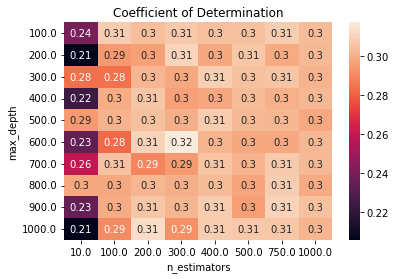

In [40]:
results_hash = random_forest_grid_cross_validation.cv_results_
results_stats_df = pd.DataFrame(columns=['max_depth', 'n_estimators', 'score'])

for param_set, mean_score in zip(results_hash['params'], results_hash['mean_test_score']):
    results_stats_df.loc[len(results_stats_df.index)] = [param_set['max_depth'], param_set['n_estimators'], mean_score]

results_stats_df = results_stats_df.pivot("max_depth", "n_estimators", "score")

ax = plt.axes()
ax = sns.heatmap(results_stats_df, annot=True)
ax.set_title('Coefficient of Determination')
plt.show()

In [41]:
print(f'The coefficient of determination is: {np.format_float_scientific(best_random_forest_regressor.score(test_X, test_Y))}')

The coefficient of determination is: 1.1321237761739378e-01


### Population and Environment Data Model

In [42]:
OUTPUT_COLS = ['COVID_Mortality_R']

NUM_CROSS_VALIDATIONS = 10

In [43]:
train_X = pop_env_data_train_X
train_Y = pop_env_data_train_Y
test_X = pop_env_data_test_X
test_Y = pop_env_data_test_Y

In [44]:
random_forest_regressor = RandomForestRegressor()

In [45]:
param_options = {
    'n_estimators': [10, 100, 200, 300, 400, 500, 750, 1000],
    'max_depth': [max(int(x), 10) for x in np.linspace(100, 1000, 10)],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

In [46]:
random_forest_regressor.fit(train_X, train_Y.values.ravel())

RandomForestRegressor()

In [47]:
random_forest_grid_cross_validation = GridSearchCV(random_forest_regressor, param_options, refit=True, cv=NUM_CROSS_VALIDATIONS).fit(train_X, train_Y.values.ravel())
best_random_forest_regressor = random_forest_grid_cross_validation.best_estimator_
best_random_forest_regressor.fit(train_X, train_Y)

/tmp/ipykernel_664/411554591.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_random_forest_regressor.fit(train_X, train_Y)


RandomForestRegressor(max_depth=700)

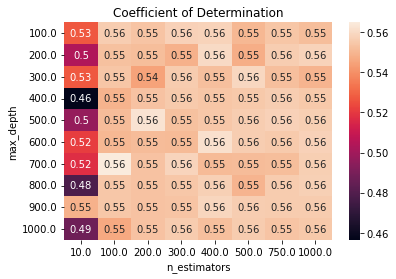

In [48]:
results_hash = random_forest_grid_cross_validation.cv_results_
results_stats_df = pd.DataFrame(columns=['max_depth', 'n_estimators', 'score'])

for param_set, mean_score in zip(results_hash['params'], results_hash['mean_test_score']):
    results_stats_df.loc[len(results_stats_df.index)] = [param_set['max_depth'], param_set['n_estimators'], mean_score]

results_stats_df = results_stats_df.pivot("max_depth", "n_estimators", "score")

ax = plt.axes()
ax = sns.heatmap(results_stats_df, annot=True)
ax.set_title('Coefficient of Determination')
plt.show()

In [49]:
print(f'The coefficient of determination is: {np.format_float_scientific(best_random_forest_regressor.score(test_X, test_Y))}')

The coefficient of determination is: 2.81208515754642e-01
